In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\Users\mpfou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Importing the dataset to pandas
data=pd.read_csv('fer2018_data.csv')
print(data.head())

   emotion   p1   p2   p3   p4   p5   p6   p7   p8   p9  ...    p2295  p2296  \
0        0   70   80   82   72   58   58   60   63   54  ...      159    182   
1        0  151  150  147  155  148  133  111  140  170  ...      105    108   
2        2  231  212  156  164  174  138  161  173  182  ...      104    138   
3        4   24   32   36   30   32   23   19   20   30  ...      174    126   
4        6    4    0    0    0    0    0    0    0    0  ...       12     34   

   p2297  p2298  p2299  p2300  p2301  p2302  p2303  p2304  
0    183    136    106    116     95    106    109     82  
1     95    108    102     67    171    193    183    184  
2    152    122    114    101     97     88    110    152  
3    132    132    133    136    139    142    143    142  
4     31     31     31     27     31     30     29     30  

[5 rows x 2305 columns]


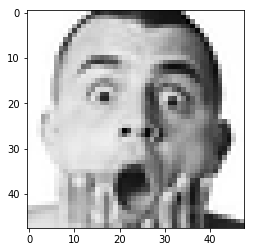

In [3]:
#Showing images in the dataset
index=108
img=np.array(data.loc[index,'p1':'p2304']).reshape(48,48)
plt.imshow(img,cmap='gray')
plt.show()

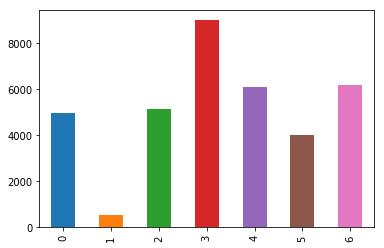

In [4]:
data['emotion'].value_counts().sort_index().plot.bar()
plt.show()

In [5]:
print(data['emotion'].value_counts().sort_index())
print(data['emotion'].value_counts().sort_index()/data.shape[0])


0    4953
1     547
2    5121
3    8989
4    6077
5    4002
6    6198
Name: emotion, dtype: int64
0    0.138017
1    0.015242
2    0.142698
3    0.250481
4    0.169337
5    0.111517
6    0.172709
Name: emotion, dtype: float64


In [6]:
#Randomizing the dataset
np.random.seed(1)
shuffled_index=np.random.permutation(data.index)
final_data=data.loc[shuffled_index]
print(final_data.head())

       emotion   p1   p2   p3   p4   p5   p6   p7   p8   p9  ...    p2295  \
35624        0  122  107   68   76  101  125  141  144  143  ...      128   
12788        3  151  151  165  135  131  141  185  164  140  ...      183   
7821         3   88   68   83  107   84   62   91  147  159  ...      162   
31831        6    0    0    0    0    0    0    0    0    0  ...      176   
16799        3  231  193  124   96  115  107   84   76   84  ...       68   

       p2296  p2297  p2298  p2299  p2300  p2301  p2302  p2303  p2304  
35624    125    123    150    133    114    137    135    139    143  
12788    205    213    187    120    146     90     50     83     76  
7821     162    168    160    137    111    122    209    228    242  
31831    181    180    180    177    177    179    184    190    185  
16799     80    100    162    239    236    238    253    239    225  

[5 rows x 2305 columns]


In [7]:
#Splitting final_data into train and test set
X=final_data.loc[:,'p1':'p2304']
y=final_data['emotion']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

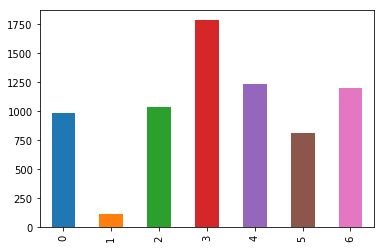

In [8]:
#Plotting emotion column of test dataset
y_test.value_counts().sort_index().plot.bar()
plt.show()

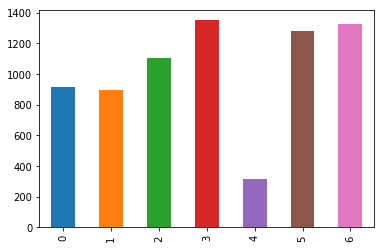

In [9]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

#Plotting emotion predicted with all features
predictions=nb.predict(X_test)
predictions=pd.DataFrame(predictions)
predictions[0].value_counts().sort_index().plot.bar()
plt.show()

In [10]:
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

Overall Accuracy of the model:0.22332125940373362


In [9]:
#Feature extraction
normalized_pixels=final_data.loc[:,'p1':'p2304']/255
sorted_var=normalized_pixels.var().sort_values(ascending=False)
greater_var=sorted_var[sorted_var>0.06]
extracted_features=greater_var.index.tolist()
print(len(extracted_features))
print(final_data[extracted_features].head())

1041
        p1  p48  p49  p96  p97  p144   p2  p145  p192  p47  ...    p490  \
35624  122  142  102  144   82   157  107    91   156  164  ...     200   
12788  151   73  138   75  148    79  151   143    70   68  ...     181   
7821    88  196  103  205   74   205   68    55   206  196  ...     188   
31831    0  219    0  211    0   197    0     0   197  206  ...       1   
16799  231  132  232  100  203    86  193   164    85   79  ...      53   

       p2100  p712  p2289  p2273  p633  p254  p225  p395  p1016  
35624    170   128    212    151   162   174   123   192    192  
12788    139   136    168     59   171   146   177   190     83  
7821     150   130    156    173   180   208   204   195    190  
31831    195   215    183    122     1     0   204     2      2  
16799     24    98     33    217    36   140   178    48     39  

[5 rows x 1041 columns]


In [12]:
nb.fit(X_train[extracted_features],y_train)
predictions=nb.predict(X_test[extracted_features])
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

Overall Accuracy of the model:0.14878796322095292


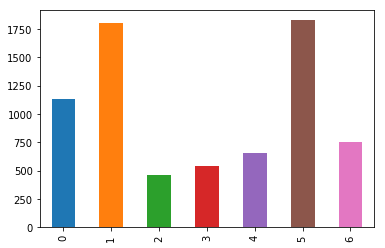

In [13]:
#Plotting emotion predicted with extracted features
predictions=pd.DataFrame(predictions)
predictions[0].value_counts().sort_index().plot.bar()
plt.show()

In [14]:
#Function for reading and normalizing each files
def read_file(file_name):
    pd_data=pd.read_csv(file_name)
    norm_data=pd_data/255
    norm_data['emotion']=pd_data['emotion']
    return norm_data

#Obtaining the features that are mostly correlated with the target column
def absolute_correlation():
    file_list=['fer2018_angry.csv','fer2018_disgust.csv','fer2018_fear.csv','fer2018_happy.csv','fer2018_sad.csv','fer2018_surprise.csv','fer2018_neutral.csv']
    top_two=[]
    top_five=[]
    top_ten=[]
    top_fifty=[]
    for file_name in file_list:
        print("Started")
        data=read_file(file_name)
        print("Read {0}".format(file_name))
        corr_coef=np.abs(data.corr()['emotion']).sort_values(ascending=False).head(11)
        print("Found corr of {0}".format(file_name))
        top_two_each=corr_coef[1:3].index.tolist()
        top_five_each=corr_coef[1:6].index.tolist()
        top_ten_each=corr_coef[1:11].index.tolist()
        
        top_two+=top_two_each
        top_five+=top_five_each
        top_ten+=top_ten_each
        
        print("Finished {0}".format(file_name))
    return top_two,top_five,top_ten 
        

In [42]:
top_14,top_35,top_70=absolute_correlation()

Started
Read fer2018_angry.csv
Found corr of fer2018_angry.csv
Finished fer2018_angry.csv
Started
Read fer2018_disgust.csv
Found corr of fer2018_disgust.csv
Finished fer2018_disgust.csv
Started
Read fer2018_fear.csv
Found corr of fer2018_fear.csv
Finished fer2018_fear.csv
Started
Read fer2018_happy.csv
Found corr of fer2018_happy.csv
Finished fer2018_happy.csv
Started
Read fer2018_sad.csv
Found corr of fer2018_sad.csv
Finished fer2018_sad.csv
Started
Read fer2018_surprise.csv
Found corr of fer2018_surprise.csv
Finished fer2018_surprise.csv
Started
Read fer2018_neutral.csv
Found corr of fer2018_neutral.csv
Finished fer2018_neutral.csv


In [18]:
print(top_14)
print(top_35)
print(top_70)

['p1362', 'p1314', 'p24', 'p25', 'p818', 'p770', 'p1897', 'p1896', 'p551', 'p599', 'p1408', 'p1456', 'p11', 'p12']
['p1362', 'p1314', 'p1363', 'p1409', 'p1315', 'p24', 'p25', 'p30', 'p26', 'p27', 'p818', 'p770', 'p866', 'p819', 'p867', 'p1897', 'p1896', 'p1849', 'p1945', 'p1944', 'p551', 'p599', 'p600', 'p648', 'p552', 'p1408', 'p1456', 'p1409', 'p840', 'p744', 'p11', 'p12', 'p53', 'p197', 'p89']
['p1362', 'p1314', 'p1363', 'p1409', 'p1315', 'p1410', 'p1361', 'p1423', 'p1375', 'p1457', 'p24', 'p25', 'p30', 'p26', 'p27', 'p29', 'p31', 'p19', 'p78', 'p79', 'p818', 'p770', 'p866', 'p819', 'p867', 'p911', 'p771', 'p863', 'p914', 'p623', 'p1897', 'p1896', 'p1849', 'p1945', 'p1944', 'p1850', 'p1898', 'p1848', 'p1993', 'p1992', 'p551', 'p599', 'p600', 'p648', 'p552', 'p647', 'p601', 'p649', 'p553', 'p550', 'p1408', 'p1456', 'p1409', 'p840', 'p744', 'p745', 'p792', 'p793', 'p1361', 'p1455', 'p11', 'p12', 'p53', 'p197', 'p89', 'p59', 'p150', 'p245', 'p137', 'p14']


In [11]:
top_14=['p1362', 'p1314', 'p24', 'p25', 'p818', 'p770', 'p1897', 'p1896', 'p551', 'p599', 'p1408', 'p1456', 'p11', 'p12']
top_35=['p1362', 'p1314', 'p1363', 'p1409', 'p1315', 'p24', 'p25', 'p30', 'p26', 'p27', 'p818', 'p770', 'p866', 'p819', 'p867', 'p1897', 'p1896', 'p1849', 'p1945', 'p1944', 'p551', 'p599', 'p600', 'p648', 'p552', 'p1408', 'p1456', 'p1409', 'p840', 'p744', 'p11', 'p12', 'p53', 'p197', 'p89']
top_70=['p1362', 'p1314', 'p1363', 'p1409', 'p1315', 'p1410', 'p1361', 'p1423', 'p1375', 'p1457', 'p24', 'p25', 'p30', 'p26', 'p27', 'p29', 'p31', 'p19', 'p78', 'p79', 'p818', 'p770', 'p866', 'p819', 'p867', 'p911', 'p771', 'p863', 'p914', 'p623', 'p1897', 'p1896', 'p1849', 'p1945', 'p1944', 'p1850', 'p1898', 'p1848', 'p1993', 'p1992', 'p551', 'p599', 'p600', 'p648', 'p552', 'p647', 'p601', 'p649', 'p553', 'p550', 'p1408', 'p1456', 'p1409', 'p840', 'p744', 'p745', 'p792', 'p793', 'p1361', 'p1455', 'p11', 'p12', 'p53', 'p197', 'p89', 'p59', 'p150', 'p245', 'p137', 'p14']

top_35=list(set(top_35))
top_70=list(set(top_70))

In [20]:
nb.fit(X_train[top_14],y_train)
predictions=nb.predict(X_test[top_14])
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

Overall Accuracy of the model:0.2151016996377821


In [21]:
nb.fit(X_train[top_35],y_train)
predictions=nb.predict(X_test[top_35])
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

Overall Accuracy of the model:0.22137085539147394


In [22]:
nb.fit(X_train[top_70],y_train)
predictions=nb.predict(X_test[top_70])
print("Overall Accuracy of the model:{0}".format(accuracy_score(y_test,predictions)))

Overall Accuracy of the model:0.22471440512677626


In [25]:
print("Overall Accuracy of the model:{0}".format(accuracy_score(data['emotion'],labels)))

Overall Accuracy of the model:0.1329172123610221


In [8]:
#Clustering with all features ,n_clusters=10
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10,random_state=1)
#Calculated distance for all features
clusters = kmeans.fit_predict(X_train)#Fit the training set without label column
kmeans.cluster_centers_.shape

(10, 2304)

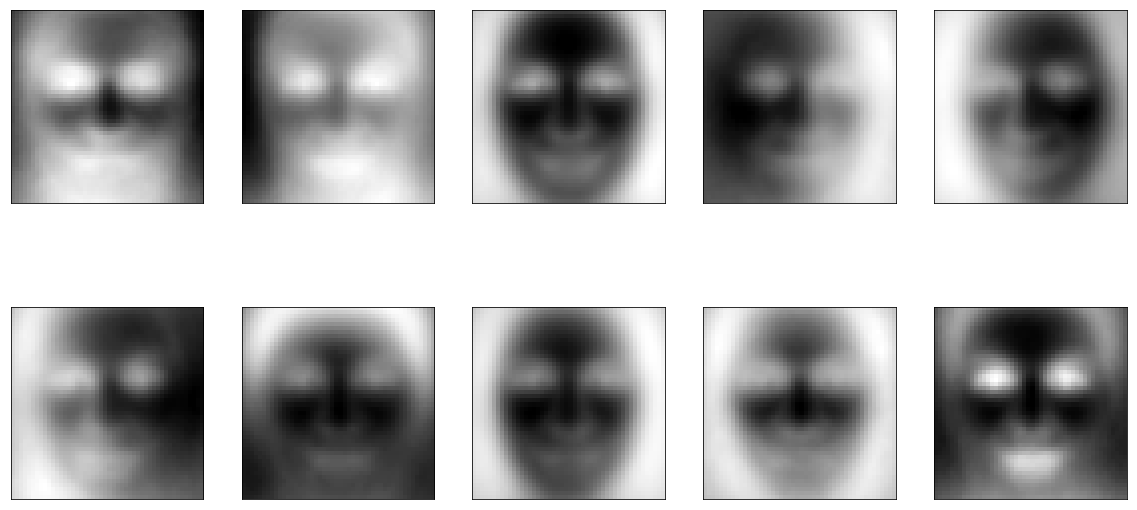

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
centers = kmeans.cluster_centers_.reshape(10,48,48)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [13]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(20):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]

In [13]:
labels

array([3, 3, 3, ..., 3, 3, 3])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, labels)

0.25960500191577557

In [15]:
#Clustering with all features ,n_clusters=20

kmeans=KMeans(n_clusters=20,random_state=1)
#Calculated distance for all features
kmeans.fit(X_train)#Fit the training set without label column
labels=kmeans.predict(X_test)


28709

In [15]:
def find_clusters(n_num,features):
    kmeans=KMeans(n_clusters=n_num,random_state=1)
    #Calculated distance for all features
    clusters = kmeans.fit_predict(X_train[features])#Fit the training set without label column
    print(kmeans.cluster_centers_.shape)
    mapping={}
    labels = np.zeros_like(clusters)
    for i in range(n_num):
        mask = (clusters == i)
        labels[mask] = mode(y_train[mask])[0]
        mapping[i]=mode(y_train[mask])[0][0]
    print(accuracy_score(y_train, labels))
    cluster_test=kmeans.predict(X_test[features])
    y_predict=[mapping[c_test] for c_test in cluster_test ]
    print(accuracy_score(y_test, y_predict))
    print(mapping)
    

In [16]:
find_clusters(7,extracted_features)

(7, 1041)
0.25107109268870387
0.24811925327389245
{0: 3, 1: 3, 2: 5, 3: 3, 4: 3, 5: 3, 6: 3}


In [17]:
find_clusters(10,extracted_features)

(10, 1041)
0.25100142812358495
0.24811925327389245
{0: 3, 1: 3, 2: 3, 3: 6, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3}


In [18]:
find_clusters(20,extracted_features)

(20, 1041)
0.25535546344351945
0.2559208693229312
{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 5, 6: 3, 7: 5, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 5, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3}


In [19]:
find_clusters(50,extracted_features)

(50, 1041)
0.26204326169493886
0.25257731958762886
{0: 5, 1: 3, 2: 6, 3: 3, 4: 4, 5: 3, 6: 3, 7: 3, 8: 3, 9: 5, 10: 3, 11: 3, 12: 3, 13: 3, 14: 5, 15: 3, 16: 0, 17: 3, 18: 3, 19: 3, 20: 3, 21: 6, 22: 5, 23: 0, 24: 3, 25: 6, 26: 3, 27: 4, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 2, 34: 3, 35: 3, 36: 3, 37: 3, 38: 6, 39: 4, 40: 3, 41: 3, 42: 4, 43: 3, 44: 3, 45: 5, 46: 3, 47: 3, 48: 3, 49: 3}


In [20]:
find_clusters(100,extracted_features)

(100, 1041)
0.26960186701034516
0.26010030649205906
{0: 5, 1: 5, 2: 3, 3: 3, 4: 3, 5: 3, 6: 2, 7: 3, 8: 3, 9: 3, 10: 3, 11: 0, 12: 6, 13: 2, 14: 3, 15: 3, 16: 3, 17: 3, 18: 5, 19: 5, 20: 3, 21: 6, 22: 3, 23: 3, 24: 4, 25: 3, 26: 3, 27: 3, 28: 0, 29: 3, 30: 3, 31: 2, 32: 4, 33: 3, 34: 3, 35: 0, 36: 4, 37: 6, 38: 3, 39: 3, 40: 6, 41: 3, 42: 0, 43: 4, 44: 3, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 4, 54: 6, 55: 3, 56: 3, 57: 3, 58: 5, 59: 3, 60: 3, 61: 3, 62: 5, 63: 2, 64: 3, 65: 4, 66: 3, 67: 0, 68: 3, 69: 3, 70: 3, 71: 2, 72: 6, 73: 3, 74: 4, 75: 3, 76: 3, 77: 3, 78: 6, 79: 5, 80: 3, 81: 4, 82: 3, 83: 3, 84: 3, 85: 6, 86: 3, 87: 3, 88: 3, 89: 3, 90: 3, 91: 6, 92: 5, 93: 3, 94: 3, 95: 3, 96: 2, 97: 3, 98: 6, 99: 3}


In [21]:
find_clusters(7,top_14)

(7, 14)
0.2533700233376293
0.25536361103371413
{0: 3, 1: 4, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3}


In [22]:
find_clusters(10,top_14)

(10, 14)
0.2527082099689993
0.25327389244915016
{0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3}


In [23]:
find_clusters(20,top_14)

(20, 14)
0.27127381657320004
0.26845918083031484
{0: 4, 1: 3, 2: 3, 3: 6, 4: 3, 5: 3, 6: 4, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 5, 13: 6, 14: 3, 15: 4, 16: 3, 17: 3, 18: 3, 19: 5}


In [24]:
find_clusters(50,top_14)

(50, 14)
0.28471907764115784
0.2812761214823071
{0: 4, 1: 3, 2: 5, 3: 3, 4: 3, 5: 3, 6: 4, 7: 3, 8: 5, 9: 4, 10: 4, 11: 3, 12: 5, 13: 3, 14: 6, 15: 5, 16: 3, 17: 3, 18: 3, 19: 5, 20: 4, 21: 2, 22: 4, 23: 4, 24: 6, 25: 4, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 5, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 4, 41: 3, 42: 5, 43: 3, 44: 3, 45: 3, 46: 3, 47: 3, 48: 4, 49: 3}


In [25]:
find_clusters(100,top_14)

(100, 14)
0.2905709011111498
0.28838116466982444
{0: 5, 1: 5, 2: 3, 3: 3, 4: 4, 5: 4, 6: 3, 7: 3, 8: 3, 9: 3, 10: 4, 11: 3, 12: 4, 13: 3, 14: 3, 15: 5, 16: 3, 17: 5, 18: 3, 19: 5, 20: 3, 21: 2, 22: 3, 23: 4, 24: 2, 25: 4, 26: 3, 27: 3, 28: 6, 29: 4, 30: 3, 31: 6, 32: 2, 33: 4, 34: 4, 35: 3, 36: 6, 37: 3, 38: 4, 39: 3, 40: 3, 41: 4, 42: 5, 43: 3, 44: 3, 45: 3, 46: 6, 47: 3, 48: 2, 49: 6, 50: 6, 51: 4, 52: 5, 53: 3, 54: 3, 55: 3, 56: 3, 57: 4, 58: 3, 59: 3, 60: 3, 61: 5, 62: 4, 63: 4, 64: 0, 65: 3, 66: 3, 67: 5, 68: 4, 69: 3, 70: 5, 71: 3, 72: 3, 73: 4, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 4, 80: 3, 81: 6, 82: 3, 83: 3, 84: 3, 85: 4, 86: 3, 87: 3, 88: 6, 89: 3, 90: 6, 91: 0, 92: 5, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 3, 99: 3}


In [9]:
#Elbow method for top 14
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
mms=MinMaxScaler()
mms.fit(X_train[top_14])
Xn_train=mms.transform(X_train[top_14])
Xn_train=pd.DataFrame(Xn_train,columns=top_14)



In [11]:
print(Xn_train.shape)

(28709, 14)


In [14]:
#Elbow method to minimize within cluster sum of square
sum_of_squared_distances=[]
K=range(1,30)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(Xn_train)
    sum_of_squared_distances.append(km.inertia_)
    

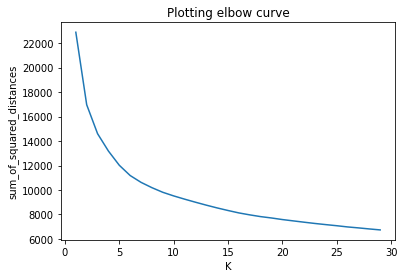

In [15]:
#Plotting elbow curve
plt.plot(K,sum_of_squared_distances)
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('Plotting elbow curve')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
K=range(1,20)
ssq=[2.934,2.9033,2.8912,2.8857,2.8812,2.8784,2.8751,2.8701,2.8673,]

In [26]:
find_clusters(7,top_35)
find_clusters(10,top_35)
find_clusters(20,top_35)
find_clusters(50,top_35)
find_clusters(100,top_35)

(7, 34)
0.25640043192030376
0.2535525215937587
{0: 3, 1: 3, 2: 4, 3: 3, 4: 3, 5: 3, 6: 3}
(10, 34)
0.2561914382249469
0.2573140150459738
{0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 3, 6: 3, 7: 3, 8: 4, 9: 3}
(20, 34)
0.274269392873315
0.27667874059626635
{0: 3, 1: 2, 2: 3, 3: 3, 4: 3, 5: 4, 6: 4, 7: 3, 8: 3, 9: 6, 10: 3, 11: 3, 12: 3, 13: 4, 14: 4, 15: 6, 16: 3, 17: 5, 18: 5, 19: 3}
(50, 34)
0.2856943815528232
0.28392309835608803
{0: 4, 1: 5, 2: 3, 3: 5, 4: 3, 5: 3, 6: 3, 7: 2, 8: 3, 9: 3, 10: 3, 11: 3, 12: 2, 13: 4, 14: 3, 15: 3, 16: 3, 17: 3, 18: 4, 19: 5, 20: 3, 21: 3, 22: 4, 23: 3, 24: 3, 25: 3, 26: 3, 27: 4, 28: 3, 29: 5, 30: 4, 31: 4, 32: 3, 33: 3, 34: 6, 35: 4, 36: 3, 37: 4, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 6, 44: 3, 45: 6, 46: 6, 47: 3, 48: 3, 49: 2}
(100, 34)
0.2919293601309694
0.28796322095291166
{0: 4, 1: 3, 2: 6, 3: 3, 4: 4, 5: 3, 6: 3, 7: 4, 8: 5, 9: 3, 10: 4, 11: 4, 12: 2, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 0, 19: 5, 20: 6, 21: 6, 22: 3, 23: 3, 24: 5, 25: 3, 26: 4, 27: 3,

In [27]:
find_clusters(7,top_70)
find_clusters(10,top_70)
find_clusters(20,top_70)
find_clusters(50,top_70)
find_clusters(100,top_70)

(7, 68)
0.2561217736598279
0.25466703817219283
{0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 3, 6: 3}
(10, 68)
0.2555992894214358
0.2575926441905823
{0: 3, 1: 3, 2: 4, 3: 4, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3}
(20, 68)
0.26284440419380684
0.26177208135971025
{0: 3, 1: 4, 2: 3, 3: 3, 4: 3, 5: 2, 6: 3, 7: 3, 8: 5, 9: 4, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 4, 17: 3, 18: 3, 19: 3}
(50, 68)
0.2822111532968755
0.28085817776539423
{0: 4, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 6, 7: 4, 8: 3, 9: 3, 10: 3, 11: 4, 12: 3, 13: 4, 14: 4, 15: 5, 16: 3, 17: 3, 18: 3, 19: 3, 20: 3, 21: 4, 22: 5, 23: 3, 24: 3, 25: 3, 26: 5, 27: 3, 28: 3, 29: 5, 30: 4, 31: 3, 32: 4, 33: 6, 34: 3, 35: 5, 36: 6, 37: 3, 38: 3, 39: 3, 40: 4, 41: 3, 42: 3, 43: 4, 44: 0, 45: 3, 46: 6, 47: 3, 48: 3, 49: 3}
(100, 68)
0.2936361419763837
0.2875452772359989
{0: 5, 1: 3, 2: 2, 3: 3, 4: 3, 5: 3, 6: 4, 7: 3, 8: 2, 9: 6, 10: 3, 11: 6, 12: 2, 13: 3, 14: 3, 15: 3, 16: 4, 17: 4, 18: 4, 19: 4, 20: 3, 21: 5, 22: 5, 23: 3, 24: 3, 25: 3, 26: 3, 27: 5

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(final_data['emotion'], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=final_data['emotion'],
            yticklabels=final_data['emotion'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
plt.show()

In [ ]:
from sklearn.cluster import MeanShift
from scipy.stats import mode
ms = MeanShift()
ms.fit(X_train[extracted_features])
clusters = ms.labels_
print(clusters)
labels = np.zeros_like(clusters)
print(len(clusters))
for i in range(len(clusters)):
    mask = (clusters == i)
    print(i)
    labels[mask] = mode(y_train[mask])[0]
    mapping[i]=mode(y_train[mask])[0][0]
print(accuracy_score(y_train, labels))
cluster_test=ms.predict(X_test[extracted_features])
y_predict=[mapping[c_test] for c_test in cluster_test ]
print(accuracy_score(y_test, y_predict))

In [34]:
#MiniBatch
from sklearn.cluster import MiniBatchKMeans, estimate_bandwidth
from scipy.stats import mode
def mini_batch_clusters(n_num,features):
    ms=MiniBatchKMeans(n_clusters=n_num)
    ms.fit(X_train[features])
    print(ms.cluster_centers_.shape)
    clusters = ms.labels_
    labels = np.zeros_like(clusters)
    mapping={}
    for i in range(ms.cluster_centers_.shape[0]):
        mask = (clusters == i)
        labels[mask] = mode(y_train[mask])[0]
        mapping[i]=mode(y_train[mask])[0][0]
    print(accuracy_score(y_train, labels))
    cluster_test=ms.predict(X_test[features])
    y_predict=[mapping[c_test] for c_test in cluster_test ]
    print(accuracy_score(y_test, y_predict))
    print(Counter(y_predict))

In [37]:
from collections import Counter
mini_batch_clusters(10,extracted_features)
mini_batch_clusters(10,top_14)
mini_batch_clusters(10,top_35)
mini_batch_clusters(10,top_70)

(10, 1041)
0.25242955170852344
0.2528559487322374
Counter({3: 6600, 5: 578})
(10, 14)
0.25215089344804764
0.24714405126776262
Counter({3: 6834, 4: 344})
(10, 34)
0.2560172768121495
0.2543884090275843
Counter({3: 6517, 4: 661})
(10, 68)
0.2594656727855376
0.25912510448592924
Counter({3: 5949, 4: 1229})


In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import mode
def h_cluster(n_num,features):
    # create dendrogram
    dendrogram = sch.dendrogram(sch.linkage(X_train[features], method='ward'))
    # create clusters
    print('Start:')
    hc = AgglomerativeClustering(n_clusters=n_num, affinity = 'euclidean', linkage = 'ward')
    # save clusters for chart
    clusters = hc.fit_predict(X_train[features])
    labels = np.zeros_like(clusters)
    mapping={}
    for i in range(n_num):
        mask = (clusters == i)
        labels[mask] = mode(y_train[mask])[0]
        mapping[i]=mode(y_train[mask])[0][0]
    print(accuracy_score(y_train, labels))
    cluster_test=hc.fit_predict(X_test[features])
    y_predict=[mapping[c_test] for c_test in cluster_test ]
    print(accuracy_score(y_test, y_predict))

Start:
0.25093176355846597
0.2486765115631095
Start:
0.256783587028458
0.21830593480078017
Start:
0.25462398550977045
0.24198941209250488
Start:
0.2576543940924449
0.20521036500417944


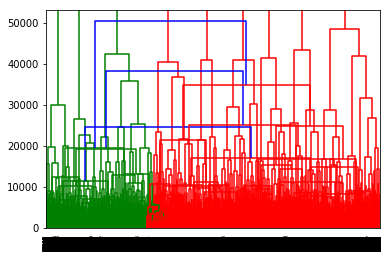

In [20]:
h_cluster(10,extracted_features)
h_cluster(10,top_14)
h_cluster(10,top_35)
h_cluster(10,top_70)

In [12]:
#Grid Search for obtaining optimal number of clusters.
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

alphas = [1,5,7,10,50,100]
param_grid = dict(n_clusters=alphas)
model = KMeans()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train[top_14])
print(grid.best_score_)
print(grid.best_estimator_.n_clusters)

-104943619.23881999
100
